In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV, cross_validate

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.dummy import DummyClassifier 

from statistics import mean
# to reduce randomness then you put the seed
np.random.seed(42)

from ArtificialImmuneSystem import *
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import KFold

from tabulate import tabulate
import time
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score


In [2]:

#Read the dataset
dataset = 'Data\GeneratedSyntheticData-testing.csv'
df = pd.read_csv(dataset)


In [3]:
#Print out the old class distribution before oversampling
print(f"Old Class Distribution: {Counter(df['5'])}")

Data shape: 
(300, 6)

Data size: 
1800

Data ndim: 
2

_____________________________________________

Old Class Distribution: Counter({0.0: 247, 1.0: 53})


c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


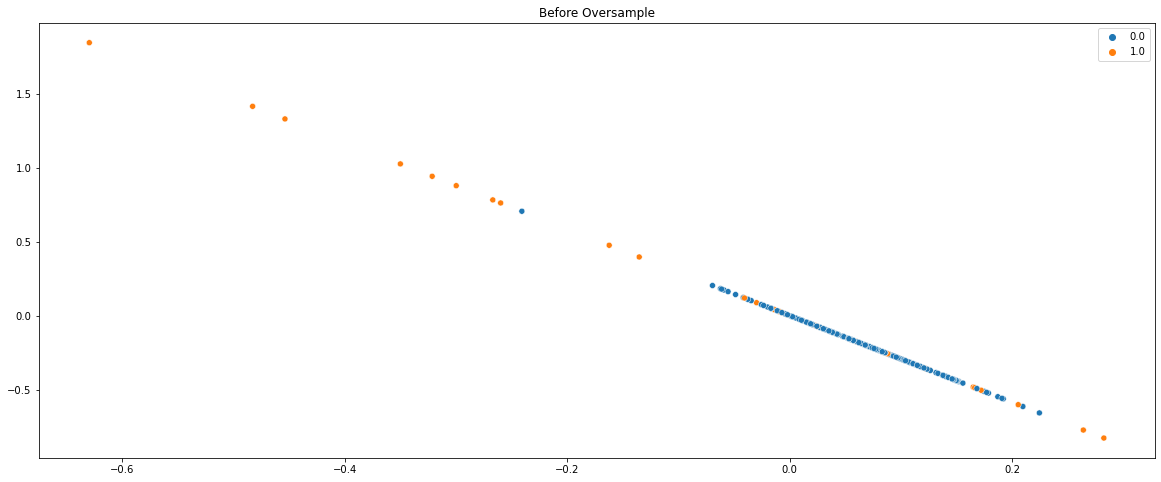

old_score: 0.3182072829131653
population_score: 0.42833333333333334
old_score: 0.42833333333333334
population_score: 0.41664884135472374
old_score: 0.42833333333333334
population_score: 0.41047619047619044
old_score: 0.42833333333333334
population_score: 0.414047619047619
old_score: 0.42833333333333334
population_score: 0.4385964912280702
old_score: 0.4385964912280702
population_score: 0.43807361541107676
old_score: 0.4385964912280702
population_score: 0.41649122807017547
old_score: 0.4385964912280702
population_score: 0.4288888888888889
old_score: 0.4385964912280702
population_score: 0.42141074611662843
old_score: 0.4385964912280702
population_score: 0.4314285714285714
old_score: 0.4385964912280702
population_score: 0.42181478652066884
old_score: 0.4385964912280702
population_score: 0.4291847265221878
old_score: 0.4385964912280702
population_score: 0.42335839598997493
old_score: 0.4385964912280702
population_score: 0.44484126984126987
old_score: 0.4385964912280702
population_score: 0.

c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


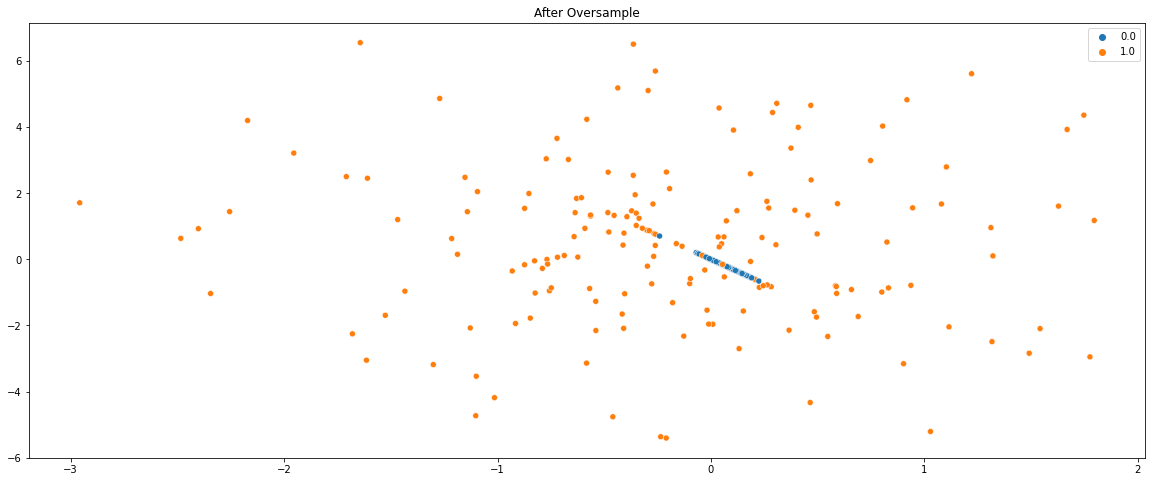

New Class Distribution: Counter({0.0: 198, 1.0: 198})
Best score GradientBoosting: 
0.7778571428571429

_____________________________________________

Best score GradientBoosting AIS: 
0.910765306122449

Best score KNeighbors: 
0.7731122448979592

_____________________________________________

Best score KNeighbors AIS: 
0.8421938775510205

Best score Logistic Regression: 
0.5178061224489796

_____________________________________________

Best score Logistic Regression AIS: 
0.7211734693877552

Best score RandomForest: 
0.7400510204081632

Best score RandomForest AIS: 
0.9184183673469388



c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


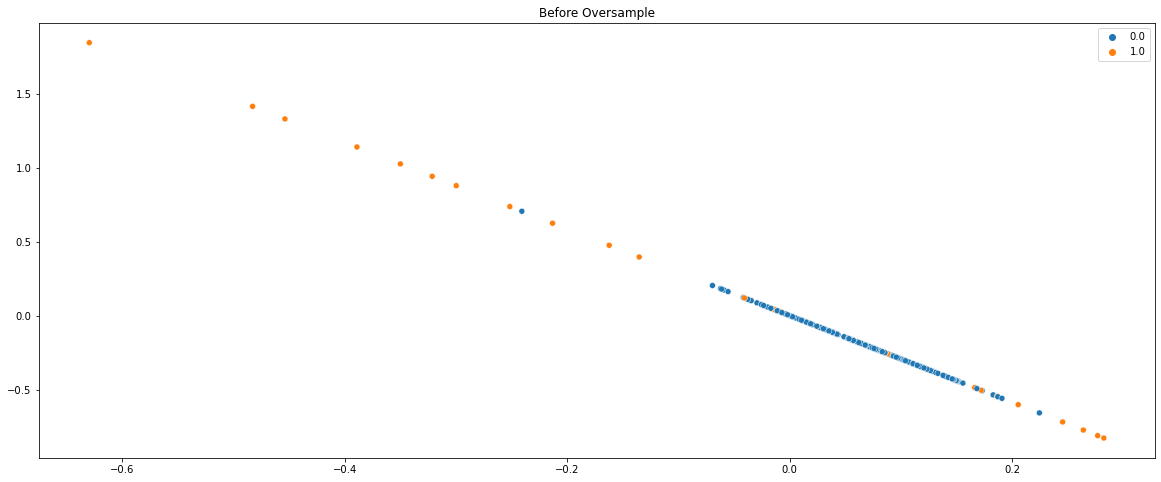

old_score: 0.44908447589562145
population_score: 0.4883660130718955
old_score: 0.4883660130718955
population_score: 0.4549363605091159
old_score: 0.4883660130718955
population_score: 0.47289239140632333
old_score: 0.4883660130718955
population_score: 0.4504575163398693
old_score: 0.4883660130718955
population_score: 0.4621007063112327
old_score: 0.4883660130718955
population_score: 0.46526315789473677
old_score: 0.4883660130718955
population_score: 0.4769298245614035
old_score: 0.4883660130718955
population_score: 0.4763237639553429
old_score: 0.4883660130718955
population_score: 0.4682828282828283
old_score: 0.4883660130718955
population_score: 0.48692982456140355
old_score: 0.4883660130718955
population_score: 0.48085139318885445
old_score: 0.4883660130718955
population_score: 0.48918472652218775
old_score: 0.4883660130718955
population_score: 0.45994949494949494
old_score: 0.4883660130718955
population_score: 0.5068317853457172
old_score: 0.5068317853457172
population_score: 0.46632

c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


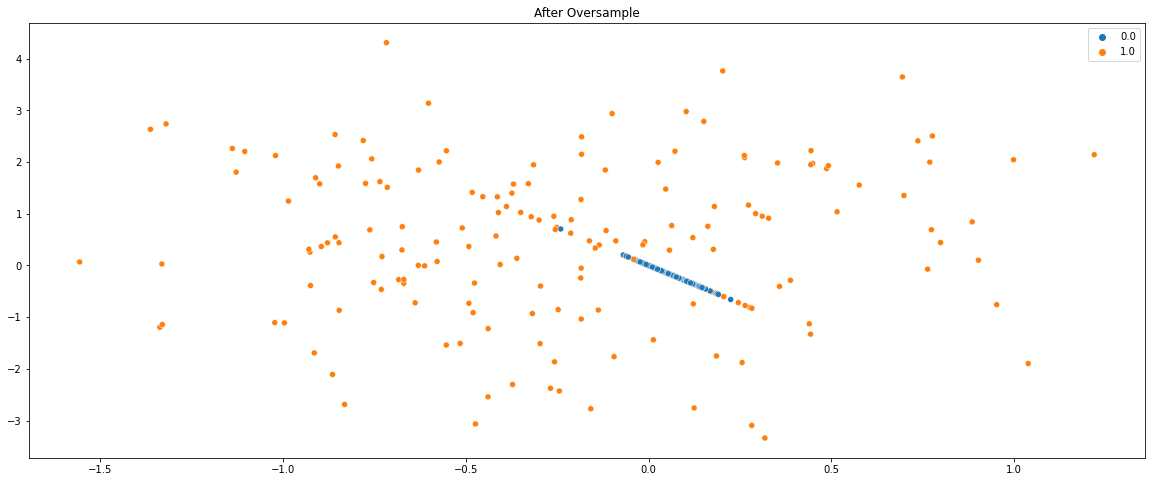

New Class Distribution: Counter({0.0: 194, 1.0: 194})
Best score GradientBoosting: 
0.8014455782312925

_____________________________________________

Best score GradientBoosting AIS: 
0.9063031462585034

Best score KNeighbors: 
0.7964498299319728

_____________________________________________

Best score KNeighbors AIS: 
0.8107993197278912

Best score Logistic Regression: 
0.5308779761904763

_____________________________________________

Best score Logistic Regression AIS: 
0.756483843537415

Best score RandomForest: 
0.7577593537414966

Best score RandomForest AIS: 
0.9089073129251701



c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


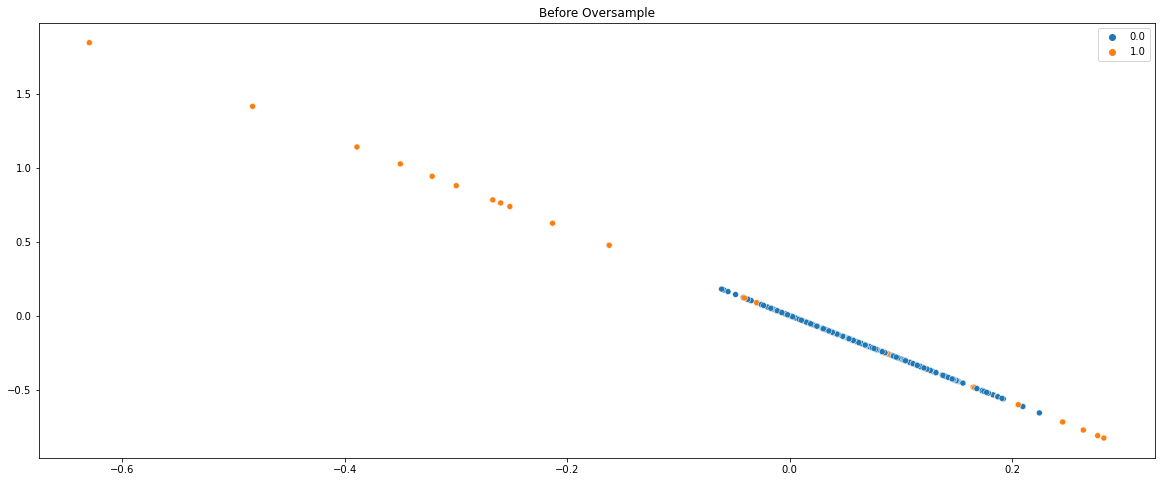

old_score: 0.4441880341880342
population_score: 0.4893927125506073
old_score: 0.4893927125506073
population_score: 0.46076023391812865
old_score: 0.4893927125506073
population_score: 0.5005038236617183
old_score: 0.5005038236617183
population_score: 0.49701176016965487
old_score: 0.5005038236617183
population_score: 0.4785380116959065
old_score: 0.5005038236617183
population_score: 0.4707602339181286
old_score: 0.5005038236617183
population_score: 0.4725206956785904
old_score: 0.5005038236617183
population_score: 0.4853634085213033
old_score: 0.5005038236617183
population_score: 0.5327260458839407
old_score: 0.5327260458839407
population_score: 0.5188371569950517
old_score: 0.5327260458839407
population_score: 0.518978798978799
old_score: 0.5327260458839407
population_score: 0.5062224187920783
old_score: 0.5327260458839407
population_score: 0.49456975772765244
old_score: 0.5327260458839407
population_score: 0.527170490328385
old_score: 0.5327260458839407
population_score: 0.49605937921

c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


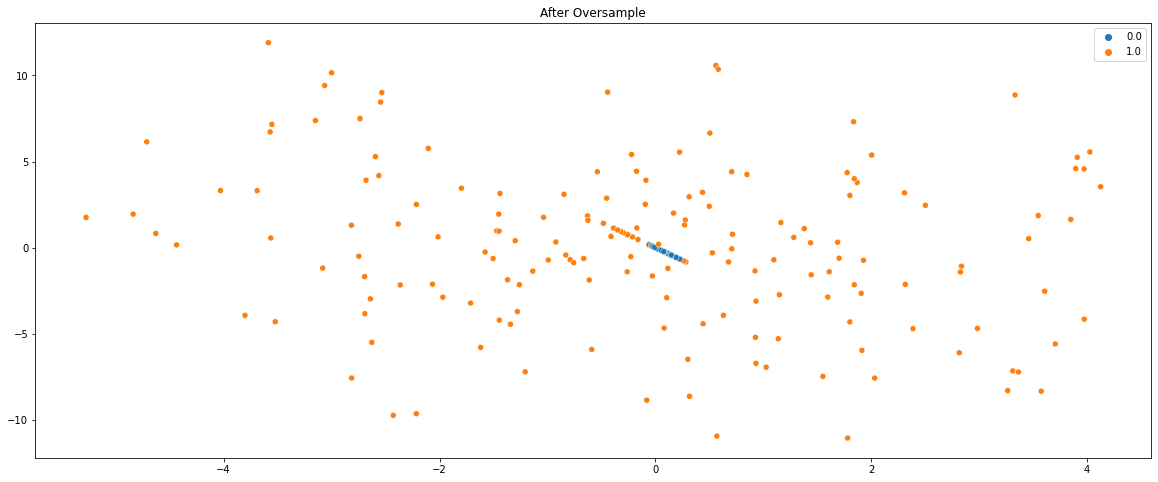

New Class Distribution: Counter({0.0: 200, 1.0: 200})
Best score GradientBoosting: 
0.7825000000000001

_____________________________________________

Best score GradientBoosting AIS: 
0.9325000000000001

Best score KNeighbors: 
0.8150000000000001

_____________________________________________

Best score KNeighbors AIS: 
0.8525

Best score Logistic Regression: 
0.625

_____________________________________________

Best score Logistic Regression AIS: 
0.6849999999999999

Best score RandomForest: 
0.7725000000000001

Best score RandomForest AIS: 
0.9325000000000001



c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


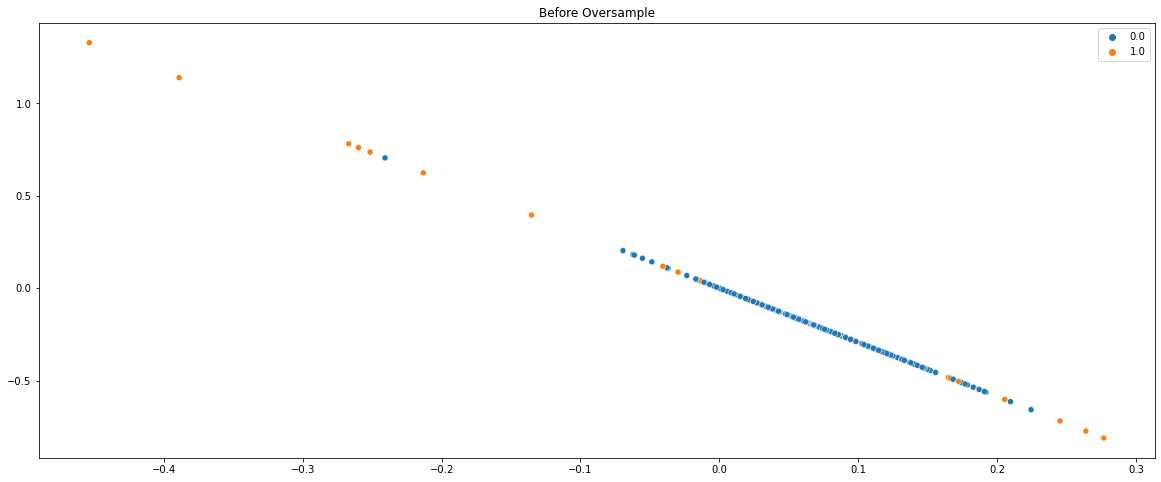

old_score: 0.40499999999999997
population_score: 0.42666666666666675
old_score: 0.42666666666666675
population_score: 0.4203463203463203
old_score: 0.42666666666666675
population_score: 0.4412698412698412
old_score: 0.4412698412698412
population_score: 0.4225441225441225
old_score: 0.4412698412698412
population_score: 0.4084493284493284
old_score: 0.4412698412698412
population_score: 0.3993939393939394
old_score: 0.4412698412698412
population_score: 0.4233211233211233
old_score: 0.4412698412698412
population_score: 0.41238095238095235
old_score: 0.4412698412698412
population_score: 0.42153846153846153
old_score: 0.4412698412698412
population_score: 0.42849816849816846
old_score: 0.4412698412698412
population_score: 0.4360683760683761
old_score: 0.4412698412698412
population_score: 0.3885714285714285
old_score: 0.4412698412698412
population_score: 0.40273504273504274
old_score: 0.4412698412698412
population_score: 0.41760683760683764
old_score: 0.4412698412698412
population_score: 0.401

c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


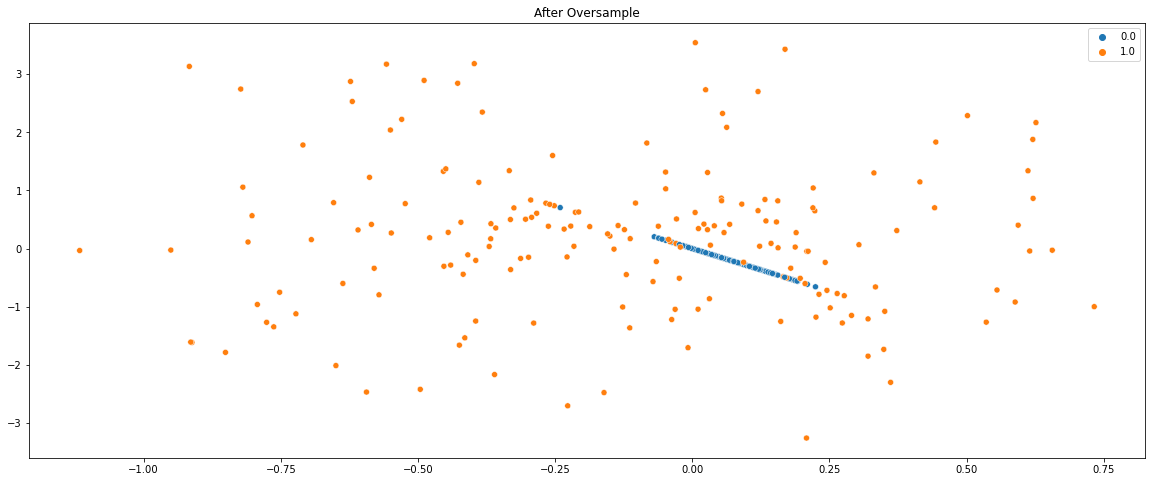

New Class Distribution: Counter({0.0: 204, 1.0: 204})
Best score GradientBoosting: 
0.7745098039215685

_____________________________________________

Best score GradientBoosting AIS: 
0.9191176470588236

Best score KNeighbors: 
0.7843137254901961

_____________________________________________

Best score KNeighbors AIS: 
0.7892156862745098

Best score Logistic Regression: 
0.5980392156862745

_____________________________________________

Best score Logistic Regression AIS: 
0.7034313725490196

Best score RandomForest: 
0.7549019607843137

Best score RandomForest AIS: 
0.9215686274509804



c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


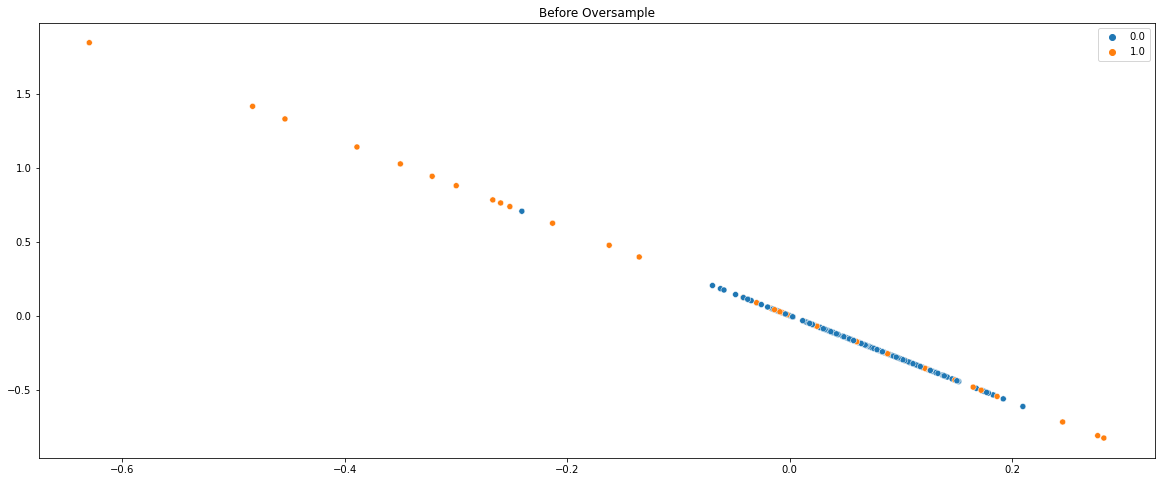

old_score: 0.38483738483738483
population_score: 0.37773664931559664
old_score: 0.38483738483738483
population_score: 0.4015461731251205
old_score: 0.4015461731251205
population_score: 0.43196741854636594
old_score: 0.43196741854636594
population_score: 0.4202852049910873
old_score: 0.43196741854636594
population_score: 0.4214912280701754
old_score: 0.43196741854636594
population_score: 0.4151097663945961
old_score: 0.43196741854636594
population_score: 0.4542201657991131
old_score: 0.4542201657991131
population_score: 0.4745112781954887
old_score: 0.4745112781954887
population_score: 0.4283155080213904
old_score: 0.4745112781954887
population_score: 0.4401120448179272
old_score: 0.4745112781954887
population_score: 0.4226307026307026
old_score: 0.4745112781954887
population_score: 0.44296918767507004
old_score: 0.4745112781954887
population_score: 0.4565384615384615
old_score: 0.4745112781954887
population_score: 0.42588744588744587
old_score: 0.4745112781954887
population_score: 0.43

c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


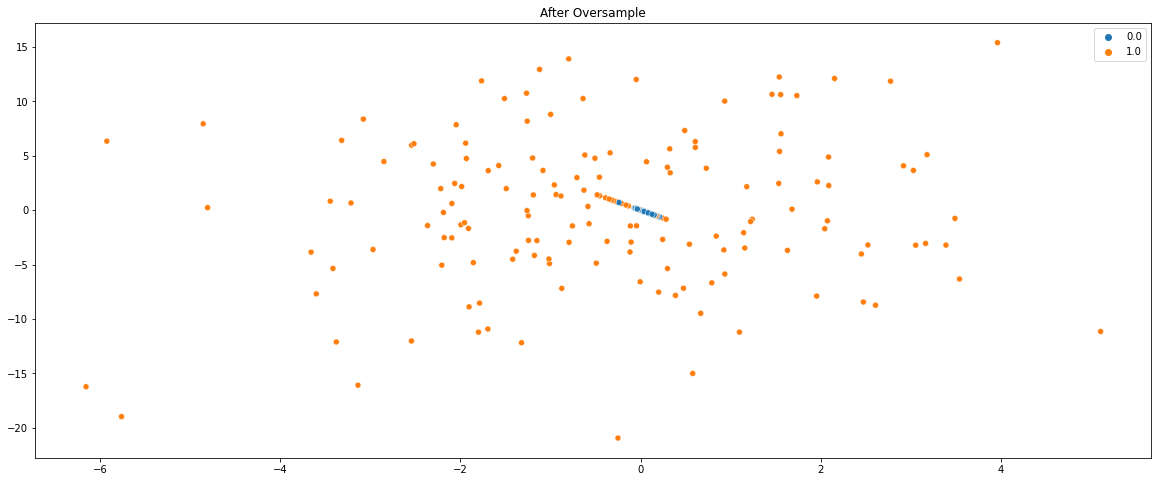

New Class Distribution: Counter({0.0: 192, 1.0: 192})
Best score GradientBoosting: 
0.7421875

_____________________________________________

Best score GradientBoosting AIS: 
0.9010416666666665

Best score KNeighbors: 
0.7734375

_____________________________________________

Best score KNeighbors AIS: 
0.8359375

Best score Logistic Regression: 
0.6354166666666666

_____________________________________________

Best score Logistic Regression AIS: 
0.7708333333333333

Best score RandomForest: 
0.71875

Best score RandomForest AIS: 
0.9088541666666667



In [4]:
#K Fold Object set to 5 splits
kf = KFold(n_splits=5)

#Array to hold the data for AISOv between each fold
dataAIS = []
#Array to hold the data for SMOTE between each fold
dataSMOTE = []
#Array to hold the data for base between each fold
dataBase = []
#Array to hold all data
data = []
#Value to keep track of current fold
fold = 0
#Value to enter the current test param into the result csv
paramEntry = "max_rounds = 125, stopping_cond = 35, model = GradientBoostingClassifier(),K_folds = 5,scorer = 'f1',min_change = 0.01, use_lof = True, mutation_rate = 1.0"

#Go through each kfold 
for result in kf.split(df):

    #Increase fold count
    fold = fold+1

    #Get the train set
    data_train = df.iloc[result[0]]

    #Get the test data
    data_test =  df.iloc[result[1]]
    
    #Copy the train sets to be oversampled with AISOv and SMOTE 
    data_train_AIS = data_train.copy()
    data_train_SMOTE = data_train.copy()

    #Plot the data before oversampling
    f, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(20,8))
    sns.scatterplot(data_train_AIS.drop(["5"], axis=1).values[:,0],data_train_AIS.drop(["5"], axis=1).values[:,1], hue=data_train_AIS.drop(data_train_AIS.columns[0:-1],axis=1).values.ravel(),ax=ax1)
    ax1.set_title("Before Oversample")
    plt.show()

    #Create an SMOTE oversampling object
    oversample = SMOTE()
    #Create an AISOv oversampling object
    oversample_AIS = ArtificialImmuneSystem()

    #Intalize clasifers to enter into the parameter for AISOv
    randomForest = RandomForestClassifier()
    logisticRegression = LogisticRegression()
    kNeighbors = KNeighborsClassifier()
    gradientBoosting = GradientBoostingClassifier()

    #Get the current computer time to time the oversampling object
    st = time.time()
    #Oversample using SMOTE
    x_over, y_over = oversample.fit_resample(data_train_SMOTE.drop(["5"], axis=1), data_train_SMOTE.drop(data_train_SMOTE.columns[0:-1],axis=1))
    #get the current time and record the overal time
    elapsed_time_SMOTE = time.time() - st
    
    #Get the current computer time to time the oversampling object
    st = time.time()
    #Oversample using SMOTE
    input_x_over_AIS, y_over_AIS = oversample_AIS.AIS_Resample(data_train_AIS.drop(["5"], axis=1), data_train_AIS.drop(data_train_AIS.columns[0:-1],axis=1),max_rounds = 125, stopping_cond = 35, model = gradientBoosting ,K_folds = 5,scorer = 'f1',min_change = 0.01, use_lof = True, mutation_rate = 1.0)
    #get the current time and record the overal time
    elapsed_time_AIS = time.time() - st

    #Rejoin the oversampled data for simplicity
    smote_df = pd.concat([x_over, y_over], axis=1)
    ais_df = pd.concat([input_x_over_AIS, y_over_AIS], axis=1)

    #Plot the oversampled data using AISOv
    f, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(20,8))
    sns.scatterplot(ais_df.drop(["5"], axis=1).values[:,0],ais_df.drop(["5"], axis=1).values[:,1], hue=ais_df.drop(ais_df.columns[0:-1],axis=1).values.ravel(),ax=ax1)
    ax1.set_title("After Oversample")
    plt.show()

    #Print the new class distribution after oversampling
    print(f"New Class Distribution: {Counter(ais_df['5'])}")

    #Fit gradient boosting classifier to each model of oversample
    gradientBoosting = GradientBoostingClassifier()
    gradientBoosting = gradientBoosting.fit(x_over, y_over.values.ravel())

    gradientBoosting_AIS = GradientBoostingClassifier()
    gradientBoosting_AIS = gradientBoosting.fit(input_x_over_AIS, y_over_AIS.values.ravel())

    gradientBoosting_Base = gradientBoosting.fit(data_train.drop(["5"], axis=1), data_train.drop(data_train_AIS.columns[0:-1],axis=1).values.ravel())

    #Fit random forest classifier to each model of oversample
    randomForest = RandomForestClassifier()
    randomForest = randomForest.fit(x_over,y_over.values.ravel())

    randomForest = RandomForestClassifier()
    randomForest_AIS  = randomForest.fit(input_x_over_AIS,y_over_AIS.values.ravel())

    randomForest_Base = randomForest.fit(data_train.drop(["5"], axis=1), data_train.drop(data_train_AIS.columns[0:-1],axis=1).values.ravel())
    

    #Fit knn classifier to each model of oversample
    kNeighbors = KNeighborsClassifier()
    kNeighbors = kNeighbors.fit(x_over,y_over.values.ravel())

    kNeighbors = KNeighborsClassifier()
    kNeighbors_AIS  = kNeighbors.fit(input_x_over_AIS,y_over_AIS.values.ravel())
    kNeighbors_Base = kNeighbors.fit(data_train.drop(["5"], axis=1), data_train.drop(data_train_AIS.columns[0:-1],axis=1).values.ravel())
    

    #Fit logistic regression classifier to each model of oversample
    logisticRegression = LogisticRegression(max_iter=5000)
    logisticRegression = logisticRegression.fit(x_over,y_over.values.ravel())

    logisticRegression = LogisticRegression(max_iter=5000)
    logisticRegression_AIS  = logisticRegression.fit(input_x_over_AIS,y_over_AIS.values.ravel())
    logisticRegression_Base = logisticRegression.fit(data_train.drop(["5"], axis=1), data_train.drop(data_train_AIS.columns[0:-1],axis=1).values.ravel())


    #Set the parameters of GradientBoosting for GridSearchCV
    parametersGradientBoosting = [
        {'learning_rate': [0.10,0.30,0.40],'min_samples_leaf': [4,8,15,20, 50, 100],'min_samples_split': [5,10,15,20,40, 60], 'n_estimators': [10,30,40,50,60,80]}
    ]

    #Set the scoring parameters for all models
    scoringX = {"roc_auc": "roc_auc", "bal_accuracy": "balanced_accuracy","accuracy": "accuracy","F1": "f1"}

    #Preform Gridsearch to find best parameters
    grid_searchGradientBoosting = GridSearchCV(gradientBoosting, parametersGradientBoosting, cv=4, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')
    grid_searchGradientBoosting_AIS = GridSearchCV(gradientBoosting_AIS, parametersGradientBoosting, cv=4, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')
   
    #Fit the GradientBoosting 
    grid_searchGradientBoosting.fit(x_over, y_over.values.ravel())
    grid_searchGradientBoosting_AIS.fit(input_x_over_AIS,y_over_AIS.values.ravel())
  
    

    #Print GridSearchCV Results
    #print(f"Best score GradientBoosting: \n{grid_searchGradientBoosting.best_score_}\n")
    #print("_____________________________________________\n")
    #print(f"Best score GradientBoosting AIS: \n{grid_searchGradientBoosting_AIS.best_score_}\n")

    #Set the parameters of KNeighbors for GridSearchCV
    parametersKNeighbors = [
        {'n_neighbors': [1,5,10,15,25,35],'weights':['uniform', 'distance'],'algorithm':['auto'], 'p': [1,5,10,20,50]}
    ]

    #Preform KNeighbors to find best parameters
    grid_searchKNeighbors = GridSearchCV(kNeighbors, parametersKNeighbors, cv=4, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')
    grid_searchKNeighbors_AIS = GridSearchCV(kNeighbors_AIS, parametersKNeighbors, cv=4, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')

    #Fit the KNeighbors 
    grid_searchKNeighbors.fit(x_over, y_over.values.ravel())
    grid_searchKNeighbors_AIS.fit(input_x_over_AIS,y_over_AIS.values.ravel())

    #Print GridSearchCV Results
    #print(f"Best score KNeighbors: \n{grid_searchKNeighbors.best_score_}\n")
    #print("_____________________________________________\n")
    #print(f"Best score KNeighbors AIS: \n{grid_searchKNeighbors_AIS.best_score_}\n")
    
    #Set the parameters of LogisticRegression for GridSearchCV
    parametersLogisticRegression = [
        {'multi_class': ['ovr'],'penalty':['none','l2'], 'C': [1,5,10,15,25]}
    ]
    #scoringX = {"roc_auc": "roc_auc", "bal_accuracy": "balanced_accuracy"}

    #Preform LogisticRegression to find best parameters
    grid_searchLogisticRegression = GridSearchCV(logisticRegression, parametersLogisticRegression, cv=4, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')
    grid_searchLogisticRegression_AIS = GridSearchCV(logisticRegression_AIS, parametersLogisticRegression, cv=4, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')

    #Fit the LogisticRegression 
    grid_searchLogisticRegression.fit(x_over, y_over.values.ravel())
    grid_searchLogisticRegression_AIS.fit(input_x_over_AIS,y_over_AIS.values.ravel())

    #Print LogisticRegression Results
    #print(f"Best score Logistic Regression: \n{grid_searchLogisticRegression.best_score_}\n")
    #print("_____________________________________________\n")
    #print(f"Best score Logistic Regression AIS: \n{grid_searchLogisticRegression_AIS.best_score_}\n")

    #Set the parameters of RandomForest for GridSearchCV
    parametersRandomForest = [
        {'n_estimators': [50,100,150,200],'max_depth': [5,10,15,20,40,60], 'bootstrap': [True, False],
        'min_samples_split': [0.05,2,5,10, 20], 'max_features': ['sqrt']}
    ]

    #Preform Gridsearch to find best parameters
    grid_searchRandomForest = GridSearchCV(randomForest, parametersRandomForest, cv=4, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')
    grid_searchRandomForest_AIS = GridSearchCV(randomForest_AIS, parametersRandomForest, cv=4, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')

    #Fit the RandomForest 
    grid_searchRandomForest.fit(x_over, y_over.values.ravel())
    grid_searchRandomForest_AIS.fit(input_x_over_AIS,y_over_AIS.values.ravel())

    #Print GridSearchCV Results
    #print(f"Best score RandomForest: \n{grid_searchRandomForest.best_score_}\n")
    #print(f"Best score RandomForest AIS: \n{grid_searchRandomForest_AIS.best_score_}\n")

    #Get the results for all classifiers 
    cross_val_resultsGB = grid_searchGradientBoosting.cv_results_
    cross_val_resultsRF = grid_searchRandomForest.cv_results_
    cross_val_resultsLR = grid_searchLogisticRegression.cv_results_
    cross_val_resultsKN = grid_searchKNeighbors.cv_results_

    cross_val_resultsGB_AIS = grid_searchGradientBoosting_AIS.cv_results_
    cross_val_resultsRF_AIS = grid_searchRandomForest_AIS.cv_results_
    cross_val_resultsLR_AIS = grid_searchLogisticRegression_AIS.cv_results_
    cross_val_resultsKN_AIS = grid_searchKNeighbors_AIS.cv_results_


    #store the results of all classifiers
    #GBC
    mean_test_roc_aucGB = mean(cross_val_resultsGB['mean_test_roc_auc'])
    mean_test_bal_accuracyGB = mean(cross_val_resultsGB['mean_test_bal_accuracy'])
    
    mean_test_roc_aucGB_AIS = mean(cross_val_resultsGB_AIS['mean_test_roc_auc'])
    mean_test_bal_accuracyGB_AIS = mean(cross_val_resultsGB_AIS['mean_test_bal_accuracy'])
   
    #RFC
    mean_test_roc_aucRF = mean(cross_val_resultsRF['mean_test_roc_auc'])
    mean_test_bal_accuracyRF = mean(cross_val_resultsRF['mean_test_bal_accuracy'])
    
    mean_test_roc_aucRF_AIS = mean(cross_val_resultsRF_AIS['mean_test_roc_auc'])
    mean_test_bal_accuracyRF_AIS = mean(cross_val_resultsRF_AIS['mean_test_bal_accuracy'])
    #LRC
    mean_test_roc_aucLR = mean(cross_val_resultsLR['mean_test_roc_auc'])
    mean_test_bal_accuracyLR = mean(cross_val_resultsLR['mean_test_bal_accuracy'])
    
    mean_test_roc_aucLR_AIS = mean(cross_val_resultsLR_AIS['mean_test_roc_auc'])
    mean_test_bal_accuracyLR_AIS = mean(cross_val_resultsLR_AIS['mean_test_bal_accuracy'])

    #KNC
    mean_test_roc_aucKN = mean(cross_val_resultsKN['mean_test_roc_auc'])
    mean_test_bal_accuracyKN = mean(cross_val_resultsKN['mean_test_bal_accuracy'])
    
    mean_test_roc_aucKN_AIS = mean(cross_val_resultsKN_AIS['mean_test_roc_auc'])
    mean_test_bal_accuracyKN_AIS = mean(cross_val_resultsKN_AIS['mean_test_bal_accuracy'])

    #Using the best estimatior from grid search to predict the class label of the test set for the model with oversampling by SMOTE
    predictions_test_over_GB = grid_searchGradientBoosting.best_estimator_.predict(data_test.drop(["5"],axis=1))
    predictions_test_over_RF = grid_searchRandomForest.best_estimator_.predict(data_test.drop(["5"],axis=1))
    predictions_test_over_LR = grid_searchLogisticRegression.best_estimator_.predict(data_test.drop(["5"],axis=1))
    predictions_test_over_KN = grid_searchKNeighbors.best_estimator_.predict(data_test.drop(["5"],axis=1))

    #Using the best estimatior from grid search to predict the class label of the test set for the model with oversampling by AISOv
    predictions_test_over_GB_AIS = grid_searchGradientBoosting_AIS.best_estimator_.predict(data_test.drop(["5"],axis=1))
    predictions_test_over_RF_AIS = grid_searchRandomForest_AIS.best_estimator_.predict(data_test.drop(["5"],axis=1))
    predictions_test_over_LR_AIS = grid_searchLogisticRegression_AIS.best_estimator_.predict(data_test.drop(["5"],axis=1))
    predictions_test_over_KN_AIS = grid_searchKNeighbors_AIS.best_estimator_.predict(data_test.drop(["5"],axis=1))

    #predict the class label of the test set for the model with no oversampling
    predictions_GB = gradientBoosting_Base.predict(data_test.drop(["5"],axis=1))
    predictions_RF = randomForest_Base.predict(data_test.drop(["5"],axis=1))
    predictions_LR = logisticRegression_Base.predict(data_test.drop(["5"],axis=1))
    predictions_KN = kNeighbors_Base.predict(data_test.drop(["5"],axis=1))

    #Get the F1 score For the model with oversmpling by SMOTE
    f1_score_GB = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_GB)
    f1_score_RF = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_RF)
    f1_score_LR = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_LR)
    f1_score_KN = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_KN)

    #Get the F1 score For the model with oversmpling by AISOv
    f1_score_GB_AIS = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_GB_AIS) 
    f1_score_RF_AIS = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_RF_AIS)
    f1_score_LR_AIS = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_LR_AIS)
    f1_score_KN_AIS = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_KN_AIS)

    #Get the F1 score For the model without oversmpling
    f1_score_GB_Base = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_GB)
    f1_score_RF_Base = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_RF)
    f1_score_LR_Base = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_LR)
    f1_score_KN_Base = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_KN)

    #Get the geometric mean score For the model with oversmpling by SMOTE
    geometric_mean_score_GB = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_GB, labels=None, pos_label=1, average='binary',)
    geometric_mean_score_RF = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_RF, labels=None, pos_label=1, average='binary',)
    geometric_mean_score_LR = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_LR, labels=None, pos_label=1, average='binary',)
    geometric_mean_score_KN = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_KN, labels=None, pos_label=1, average='binary',)

    #Get the geometric mean score For the model with oversmpling by AISOv
    geometric_mean_score_GB_AIS = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_GB_AIS, labels=None, pos_label=1, average='binary',)
    geometric_mean_score_RF_AIS = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_RF_AIS, labels=None, pos_label=1, average='binary',)
    geometric_mean_score_LR_AIS = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_LR_AIS, labels=None, pos_label=1, average='binary',)
    geometric_mean_score_KN_AIS = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_KN_AIS, labels=None, pos_label=1, average='binary',)

    #Get the geometric mean score For the model without oversmpling
    geometric_mean_score_GB_Base = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_GB, labels=None, pos_label=1, average='binary',)
    geometric_mean_score_RF_Base = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_RF, labels=None, pos_label=1, average='binary',)
    geometric_mean_score_LR_Base = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_LR, labels=None, pos_label=1, average='binary',)
    geometric_mean_score_KN_Base = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_KN, labels=None, pos_label=1, average='binary',)

    #Get the ROC AUC score For the model with oversmpling by AISOv
    roc_auc_GB_AIS = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_GB_AIS)
    roc_auc_RF_AIS = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_RF_AIS)
    roc_auc_LR_AIS = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_LR_AIS)
    roc_auc_KN_AIS = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_KN_AIS)
 
    #Get the ROC AUC score For the model without oversmpling
    roc_auc_GB_Base = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_GB)
    roc_auc_RF_Base = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_RF)
    roc_auc_LR_Base = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_LR)
    roc_auc_KN_Base = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_KN)

    #Get the ROC AUC score For the model with oversmpling by SMOTE
    roc_auc_GB = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_GB)
    roc_auc_RF = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_RF)
    roc_auc_LR = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_LR)
    roc_auc_KN = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_KN)

    
    #Get the balanced accuracy score For the model with oversmpling by AISOv
    balanced_acc_GB_AIS = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_GB_AIS)
    balanced_acc_RF_AIS = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_RF_AIS)
    balanced_acc_LR_AIS = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_LR_AIS)
    balanced_acc_KN_AIS = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_KN_AIS)
 
    #Get the balanced accuracy score For the model with oversmpling by SMOTE
    balanced_acc_GB = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_GB)
    balanced_acc_RF = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_RF)
    balanced_acc_LR = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_LR)
    balanced_acc_KN = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_KN)

    #Get the balanced accuracy score For the model without oversmpling
    balanced_acc_GB_Base = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_GB)
    balanced_acc_RF_Base = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_RF)
    balanced_acc_LR_Base = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_LR)
    balanced_acc_KN_Base = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_KN)

    #Add all results to the dataAIS array for the fold
    dataAIS.append( [fold,dataset,"AIS", elapsed_time_AIS,paramEntry, roc_auc_GB_AIS, roc_auc_RF_AIS, roc_auc_LR_AIS, roc_auc_KN_AIS, balanced_acc_GB_AIS, balanced_acc_RF_AIS,  balanced_acc_LR_AIS,  balanced_acc_KN_AIS, geometric_mean_score_GB_AIS, geometric_mean_score_RF_AIS, geometric_mean_score_LR_AIS, geometric_mean_score_KN_AIS,f1_score_GB_AIS,f1_score_RF_AIS,f1_score_LR_AIS,f1_score_KN_AIS ])
    #Add all results to the dataSMOTE array for the fold
    dataSMOTE.append([fold,dataset,"SMOTE", elapsed_time_SMOTE,"NA", roc_auc_GB,  roc_auc_RF, roc_auc_LR,roc_auc_KN, balanced_acc_GB, balanced_acc_RF,  balanced_acc_LR,  balanced_acc_KN, geometric_mean_score_GB, geometric_mean_score_RF, geometric_mean_score_LR, geometric_mean_score_KN,f1_score_GB,f1_score_RF,f1_score_LR,f1_score_KN])
    #Add all results to the dataBase array for the fold
    dataBase.append([fold,dataset,"BASE", "NA","NA", roc_auc_GB_Base, roc_auc_RF_Base, roc_auc_LR_Base, roc_auc_KN_Base, balanced_acc_GB_Base, balanced_acc_RF_Base,balanced_acc_LR_Base,  balanced_acc_KN_Base, geometric_mean_score_GB_Base, geometric_mean_score_RF_Base, geometric_mean_score_LR_Base, geometric_mean_score_KN_Base,f1_score_GB_Base,f1_score_RF_Base,f1_score_LR_Base,f1_score_KN_Base])
    #Append the data to the data array
    data.append(dataAIS[fold-1])
    data.append(dataSMOTE[fold-1])
    data.append(dataBase[fold-1])
    #Append a break for the csv
    data.append(["","","","","","","","","","","","","","","","","","","","",""])

#Value to collect AISOv runtime
average_AIS_Runtime = 0

#Value to collect ROC AUC results for AISOv model
average_roc_auc_GB_AIS = 0
average_roc_auc_RF_AIS = 0
average_roc_auc_LR_AIS = 0
average_roc_auc_KN_AIS = 0

#Value to collect balanced accuracy results for AISOv model
average_balanced_acc_GB_AIS = 0
average_balanced_acc_RF_AIS = 0
average_balanced_acc_LR_AIS = 0
average_balanced_acc_KN_AIS = 0

#Value to collect geometric mean results for AISOv model
average_geometric_mean_score_GB_AIS = 0
average_geometric_mean_score_RF_AIS = 0
average_geometric_mean_score_LR_AIS = 0
average_geometric_mean_score_KN_AIS = 0

#Value to collect gradient boosting results for AISOv model
average_f1_score_GB_AIS = 0
average_f1_score_RF_AIS = 0
average_f1_score_LR_AIS = 0
average_f1_score_KN_AIS = 0

#Value to collect SMOTE runtime
average_SMOTE_Runtime = 0

#Value to collect ROC AUC results for SMOTE model
average_roc_auc_GB = 0
average_roc_auc_RF = 0
average_roc_auc_LR = 0
average_roc_auc_KN = 0

#Value to collect balanced accuracy results for SMOTE model
average_balanced_acc_GB = 0
average_balanced_acc_RF = 0
average_balanced_acc_LR = 0
average_balanced_acc_KN = 0

#Value to collect geometric mean results for SMOTE model
average_geometric_mean_score_GB = 0
average_geometric_mean_score_RF = 0
average_geometric_mean_score_LR = 0
average_geometric_mean_score_KN = 0

#Value to collect f1 results for SMOTE model
average_f1_score_GB = 0
average_f1_score_RF = 0
average_f1_score_LR = 0
average_f1_score_KN = 0

#Value to collect ROC AUC results for Base model
average_roc_auc_GB_Base = 0
average_roc_auc_RF_Base = 0
average_roc_auc_LR_Base = 0
average_roc_auc_KN_Base = 0

#Value to collect balanced accuracy results for Base model
average_balanced_acc_GB_Base = 0
average_balanced_acc_RF_Base = 0
average_balanced_acc_LR_Base = 0
average_balanced_acc_KN_Base = 0

#Value to collect geometric mean results for Base model
average_geometric_mean_score_GB_Base = 0
average_geometric_mean_score_RF_Base = 0
average_geometric_mean_score_LR_Base = 0
average_geometric_mean_score_KN_Base = 0

#Value to collect f1 results for Base model
average_f1_score_GB_Base = 0
average_f1_score_RF_Base = 0
average_f1_score_LR_Base = 0
average_f1_score_KN_Base = 0

#Calculate the average in each scorer for the AISOv model
for array in dataAIS:

    average_AIS_Runtime = average_AIS_Runtime + array[3]

    average_roc_auc_GB_AIS = average_roc_auc_GB_AIS + array[5]
    average_roc_auc_RF_AIS = average_roc_auc_RF_AIS + array[6]
    average_roc_auc_LR_AIS = average_roc_auc_LR_AIS + array[7]
    average_roc_auc_KN_AIS = average_roc_auc_KN_AIS + array[8]

    average_balanced_acc_GB_AIS = average_balanced_acc_GB_AIS + array[9]
    average_balanced_acc_RF_AIS = average_balanced_acc_RF_AIS + array[10]
    average_balanced_acc_LR_AIS = average_balanced_acc_LR_AIS + array[11]
    average_balanced_acc_KN_AIS = average_balanced_acc_KN_AIS + array[12]

    average_geometric_mean_score_GB_AIS = average_geometric_mean_score_GB_AIS + array[13]
    average_geometric_mean_score_RF_AIS = average_geometric_mean_score_RF_AIS + array[14]
    average_geometric_mean_score_LR_AIS = average_geometric_mean_score_LR_AIS + array[15]
    average_geometric_mean_score_KN_AIS = average_geometric_mean_score_KN_AIS + array[16]
    
    average_f1_score_GB_AIS = average_f1_score_GB_AIS + array[17]
    average_f1_score_RF_AIS = average_f1_score_RF_AIS + array[18]
    average_f1_score_LR_AIS = average_f1_score_LR_AIS + array[19]
    average_f1_score_KN_AIS = average_f1_score_KN_AIS + array[20]

#Calculate the average in each scorer for the SMOTE model
for array in dataSMOTE:

    average_SMOTE_Runtime = average_SMOTE_Runtime + array[3]

    average_roc_auc_GB = average_roc_auc_GB + array[5]
    average_roc_auc_RF = average_roc_auc_RF + array[6]
    average_roc_auc_LR = average_roc_auc_LR + array[7]
    average_roc_auc_KN = average_roc_auc_KN + array[8]

    average_balanced_acc_GB = average_balanced_acc_GB + array[9]
    average_balanced_acc_RF = average_balanced_acc_RF + array[10]
    average_balanced_acc_LR = average_balanced_acc_LR + array[11]
    average_balanced_acc_KN = average_balanced_acc_KN + array[12]

    average_geometric_mean_score_GB = average_geometric_mean_score_GB + array[13]
    average_geometric_mean_score_RF = average_geometric_mean_score_RF + array[14]
    average_geometric_mean_score_LR = average_geometric_mean_score_LR + array[15]
    average_geometric_mean_score_KN = average_geometric_mean_score_KN + array[16]
    
    average_f1_score_GB = average_f1_score_GB + array[17]
    average_f1_score_RF = average_f1_score_RF + array[18]
    average_f1_score_LR = average_f1_score_LR + array[19]
    average_f1_score_KN = average_f1_score_KN + array[20]

#Calculate the average in each scorer for the Base model
for array in dataBase:

    average_roc_auc_GB_Base = average_roc_auc_GB_Base + array[5]
    average_roc_auc_RF_Base = average_roc_auc_RF_Base + array[6]
    average_roc_auc_LR_Base = average_roc_auc_LR_Base + array[7]
    average_roc_auc_KN_Base = average_roc_auc_KN_Base + array[8]

    average_balanced_acc_GB_Base = average_balanced_acc_GB_Base + array[9]
    average_balanced_acc_RF_Base = average_balanced_acc_RF_Base + array[10]
    average_balanced_acc_LR_Base = average_balanced_acc_LR_Base + array[11]
    average_balanced_acc_KN_Base = average_balanced_acc_KN_Base + array[12]

    average_geometric_mean_score_GB_Base = average_geometric_mean_score_GB_Base + array[13]
    average_geometric_mean_score_RF_Base = average_geometric_mean_score_RF_Base + array[14]
    average_geometric_mean_score_LR_Base = average_geometric_mean_score_LR_Base + array[15]
    average_geometric_mean_score_KN_Base = average_geometric_mean_score_KN_Base + array[16]
    
    average_f1_score_GB_Base = average_f1_score_GB_Base + array[17]
    average_f1_score_RF_Base = average_f1_score_RF_Base + array[18]
    average_f1_score_LR_Base = average_f1_score_LR_Base + array[19]
    average_f1_score_KN_Base = average_f1_score_KN_Base + array[20]

#Calaculate the final averages
average_f1_score_GB = average_f1_score_GB / fold
average_f1_score_RF = average_f1_score_RF / fold
average_f1_score_LR = average_f1_score_LR / fold
average_f1_score_KN= average_f1_score_KN / fold

average_f1_score_GB_AIS = average_f1_score_GB_AIS / fold
average_f1_score_RF_AIS = average_f1_score_RF_AIS / fold
average_f1_score_LR_AIS = average_f1_score_LR_AIS / fold
average_f1_score_KN_AIS = average_f1_score_KN_AIS / fold

average_f1_score_GB_Base = average_f1_score_GB_Base / fold
average_f1_score_RF_Base = average_f1_score_RF_Base / fold
average_f1_score_LR_Base = average_f1_score_LR_Base / fold
average_f1_score_KN_Base= average_f1_score_KN_Base / fold

average_geometric_mean_score_GB = average_geometric_mean_score_GB / fold
average_geometric_mean_score_RF= average_geometric_mean_score_RF / fold
average_geometric_mean_score_LR= average_geometric_mean_score_LR / fold
average_geometric_mean_score_KN = average_geometric_mean_score_KN / fold

average_geometric_mean_score_GB_AIS= average_geometric_mean_score_GB_AIS / fold
average_geometric_mean_score_RF_AIS= average_geometric_mean_score_RF_AIS / fold
average_geometric_mean_score_LR_AIS = average_geometric_mean_score_LR_AIS / fold
average_geometric_mean_score_KN_AIS = average_geometric_mean_score_KN_AIS / fold

average_geometric_mean_score_GB_Base = average_geometric_mean_score_GB_Base / fold
average_geometric_mean_score_RF_Base= average_geometric_mean_score_RF_Base / fold
average_geometric_mean_score_LR_Base= average_geometric_mean_score_LR_Base / fold
average_geometric_mean_score_KN_Base= average_geometric_mean_score_KN_Base / fold

    
average_roc_auc_GB_AIS= average_roc_auc_GB_AIS / fold
average_roc_auc_RF_AIS= average_roc_auc_RF_AIS / fold
average_roc_auc_LR_AIS= average_roc_auc_LR_AIS / fold
average_roc_auc_KN_AIS= average_roc_auc_KN_AIS / fold
 
average_roc_auc_GB_Base = average_roc_auc_GB_Base / fold
average_roc_auc_RF_Base= average_roc_auc_RF_Base / fold
average_roc_auc_LR_Base= average_roc_auc_LR_Base / fold
average_roc_auc_KN_Base= average_roc_auc_KN_Base / fold

average_roc_auc_GB= average_roc_auc_GB / fold
average_roc_auc_RF= average_roc_auc_RF / fold
average_roc_auc_LR= average_roc_auc_LR / fold
average_roc_auc_KN= average_roc_auc_KN / fold

    

average_balanced_acc_GB_AIS= average_balanced_acc_GB_AIS / fold
average_balanced_acc_RF_AIS= average_balanced_acc_RF_AIS / fold
average_balanced_acc_LR_AIS= average_balanced_acc_LR_AIS / fold
average_balanced_acc_KN_AIS= average_balanced_acc_KN_AIS / fold
 
average_balanced_acc_GB= average_balanced_acc_GB / fold
average_balanced_acc_RF= average_balanced_acc_RF / fold
average_balanced_acc_LR= average_balanced_acc_LR / fold
average_balanced_acc_KN= average_balanced_acc_KN / fold

    
average_balanced_acc_GB_Base= average_balanced_acc_GB_Base / fold
average_balanced_acc_RF_Base= average_balanced_acc_RF_Base / fold
average_balanced_acc_LR_Base= average_balanced_acc_LR_Base / fold
average_balanced_acc_KN_Base= average_balanced_acc_KN_Base / fold


#Append the data to the csv data
data.append( ["","","AIS", "","AVERAGE:", average_roc_auc_GB_AIS, average_roc_auc_RF_AIS, average_roc_auc_LR_AIS, average_roc_auc_KN_AIS, average_balanced_acc_GB_AIS, average_balanced_acc_RF_AIS,  average_balanced_acc_LR_AIS,  average_balanced_acc_KN_AIS, average_geometric_mean_score_GB_AIS, average_geometric_mean_score_RF_AIS, average_geometric_mean_score_LR_AIS, average_geometric_mean_score_KN_AIS,average_f1_score_GB_AIS,average_f1_score_RF_AIS,average_f1_score_LR_AIS,average_f1_score_KN_AIS ])
data.append(["","","SMOTE", "","AVERAGE:", average_roc_auc_GB,  average_roc_auc_RF, average_roc_auc_LR,average_roc_auc_KN, average_balanced_acc_GB, average_balanced_acc_RF,  average_balanced_acc_LR,  average_balanced_acc_KN, average_geometric_mean_score_GB, average_geometric_mean_score_RF, average_geometric_mean_score_LR, average_geometric_mean_score_KN,average_f1_score_GB,average_f1_score_RF,average_f1_score_LR,average_f1_score_KN])
data.append(["","","BASE", "","AVERAGE:", average_roc_auc_GB_Base, average_roc_auc_RF_Base, average_roc_auc_LR_Base, average_roc_auc_KN_Base, average_balanced_acc_GB_Base, average_balanced_acc_RF_Base,balanced_acc_LR_Base,  average_balanced_acc_KN_Base, average_geometric_mean_score_GB_Base, average_geometric_mean_score_RF_Base, average_geometric_mean_score_LR_Base, average_geometric_mean_score_KN_Base,average_f1_score_GB_Base,average_f1_score_RF_Base,average_f1_score_LR_Base,average_f1_score_KN_Base])
data.append(["","","","","","","","","","","","","","","","","","","","",""])
    

In [5]:
#Create a new CSV or append an existing one
col_names = ["Fold", "Dataset","Oversample","Oversample Run Time", "Oversample Paramaters", "ROC AUC for Gradient Boosting",  "ROC AUC for Random Forests", "ROC AUC for Logistic Regression",  "ROC AUC for K Nearest Neighbours", "Balanced Accuracy for Gradient Boosting", "Balanced Accuracy for Random Forests" ,"Balanced Accuracy for Logistic Regression","Balanced Accuracy for K Nearest Neighbours", "Geometric Mean Score for Gradient Boosting", "Geometric Mean Score for Random Forest", "Geometric Mean Score for Logestic Regression", "Geometric Mean Score for K Neighbors", "F1 Score for Gradient Boosting", "F1 Score for Random Forest", "F1 Score for Logestic Regression", "F1 Score for K Neighbors"]
dfoutput=pd.DataFrame(data,columns=col_names)
#Change name for new csv
title = "ExperimentalResults/ExperimentalComparisons-TestingTunning.csv"
dfoutput.to_csv(title, mode='a',index=False) 

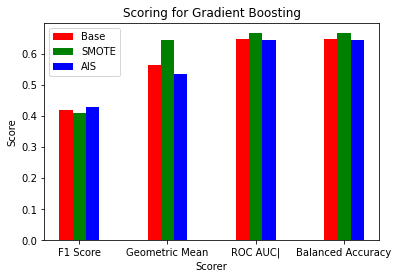

In [6]:
n = 4
ind = np.arange(n)
width = 0.15

xvals = [average_f1_score_GB_Base, average_geometric_mean_score_GB_Base, average_roc_auc_GB_Base, average_balanced_acc_GB_Base]
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = [average_f1_score_GB, average_geometric_mean_score_GB, average_roc_auc_GB, average_balanced_acc_GB]
bar2 = plt.bar(ind+width, yvals, width, color = 'g')

zvals = [average_f1_score_GB_AIS, average_geometric_mean_score_GB_AIS, average_roc_auc_GB_AIS, average_balanced_acc_GB_AIS]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Scorer")
plt.ylabel("Score")
plt.title("Scoring for Gradient Boosting")

plt.xticks(ind+width,["F1 Score", "Geometric Mean", "ROC AUC|", "Balanced Accuracy"])
plt.legend((bar1,bar2,bar3), ('Base','SMOTE', 'AIS'))

plt.show()

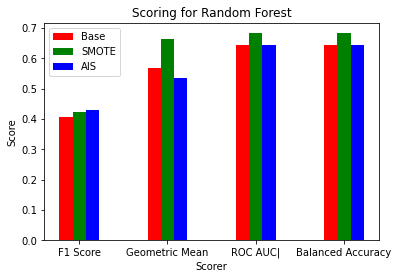

In [7]:
n = 4
ind = np.arange(n)
width = 0.15

xvals = [average_f1_score_RF_Base, average_geometric_mean_score_RF_Base, average_roc_auc_RF_Base, average_balanced_acc_RF_Base]
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = [average_f1_score_RF, average_geometric_mean_score_RF, average_roc_auc_RF, average_balanced_acc_RF]
bar2 = plt.bar(ind+width, yvals, width, color = 'g')

zvals = [average_f1_score_RF_AIS, average_geometric_mean_score_RF_AIS, average_roc_auc_RF_AIS, average_balanced_acc_RF_AIS]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Scorer")
plt.ylabel("Score")
plt.title("Scoring for Random Forest")

plt.xticks(ind+width,["F1 Score", "Geometric Mean", "ROC AUC|", "Balanced Accuracy"])
plt.legend((bar1,bar2,bar3), ('Base','SMOTE', 'AIS'))

plt.show()

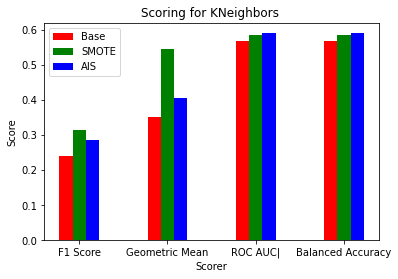

In [8]:
n = 4
ind = np.arange(n)
width = 0.15

xvals = [average_f1_score_KN_Base, average_geometric_mean_score_KN_Base, average_roc_auc_KN_Base, average_balanced_acc_KN_Base]
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = [average_f1_score_KN, average_geometric_mean_score_KN, average_roc_auc_KN, average_balanced_acc_KN]
bar2 = plt.bar(ind+width, yvals, width, color = 'g')

zvals = [average_f1_score_KN_AIS, average_geometric_mean_score_KN_AIS, average_roc_auc_KN_AIS, average_balanced_acc_KN_AIS]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Scorer")
plt.ylabel("Score")
plt.title("Scoring for KNeighbors ")

plt.xticks(ind+width,["F1 Score", "Geometric Mean", "ROC AUC|", "Balanced Accuracy"])
plt.legend((bar1,bar2,bar3), ('Base','SMOTE', 'AIS'))

plt.show()

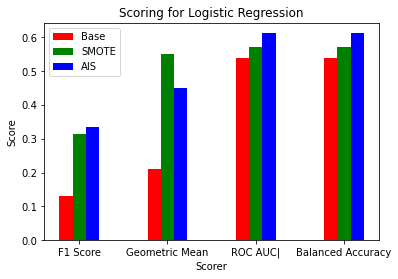

In [9]:
n = 4
ind = np.arange(n)
width = 0.15

xvals = [average_f1_score_LR_Base, average_geometric_mean_score_LR_Base, average_roc_auc_LR_Base, average_balanced_acc_LR_Base]
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = [average_f1_score_LR, average_geometric_mean_score_LR, average_roc_auc_LR, average_balanced_acc_LR]
bar2 = plt.bar(ind+width, yvals, width, color = 'g')

zvals = [average_f1_score_LR_AIS, average_geometric_mean_score_LR_AIS, average_roc_auc_LR_AIS, average_balanced_acc_LR_AIS]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Scorer")
plt.ylabel("Score")
plt.title("Scoring for Logistic Regression")

plt.xticks(ind+width,["F1 Score", "Geometric Mean", "ROC AUC|", "Balanced Accuracy"])
plt.legend((bar1,bar2,bar3), ('Base','SMOTE', 'AIS'))

plt.show()